In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as plt

In [3]:
real_estate = pd.read_csv('data/real_estate.csv')

real_estate.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [5]:
real_estate.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
real_estate.shape

(13320, 9)

# After Checking DataSet...Start Cleaning.....

#"area_type" column cleaning

In [7]:
real_estate["area_type"].nunique() #4 types
real_estate["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

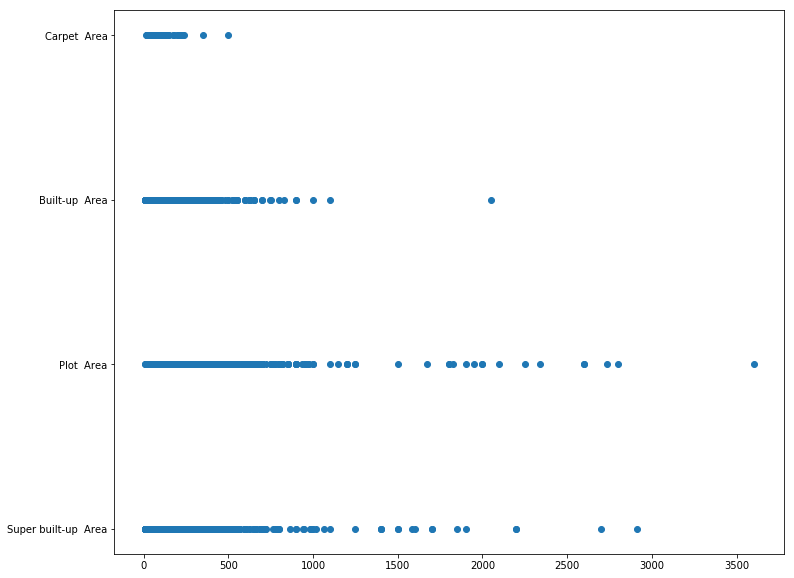

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(real_estate['price'], real_estate['area_type'])
plt.show()
real_estate["area_type"].value_counts()

In [9]:
# on average plot Area and Super build-up Area seems to have more influance on price then others 
# they need higher weights

# we give approx weights 1,2,3,4
real_estate['area_type']=real_estate['area_type'].map({'Carpet  Area': 1, 'Plot  Area': 3, 'Built-up  Area': 2, 'Super built-up  Area': 4})

real_estate.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,3,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,4,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 936.6+ KB


# handling "size" column

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
18 Bedroom       1
12 Bedroom       1
19 BHK           1
13 BHK           1
27 BHK           1
16 BHK           1
43 Bedroom       1
14 BHK           1
Name: size, dtype: int64

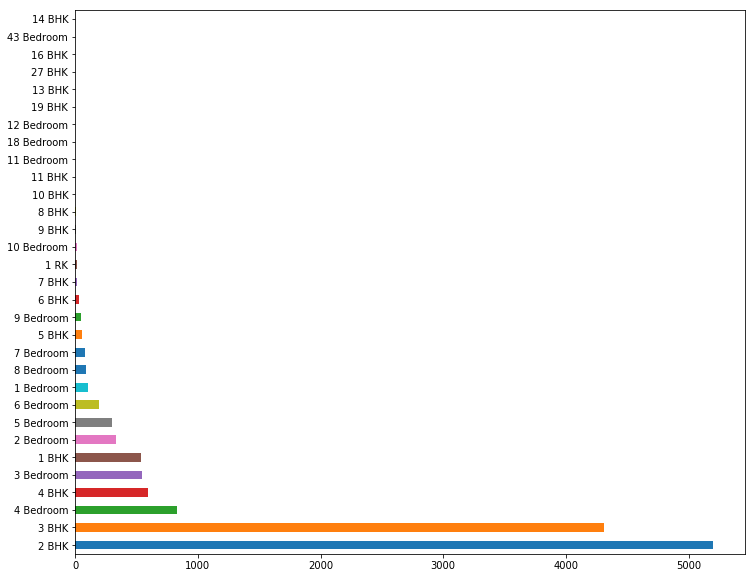

In [11]:
real_estate["size"].value_counts().plot('barh',figsize=(12,10))
real_estate["size"].value_counts()

In [12]:
real_estate.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
real_estate["size"].fillna('2',inplace=True)

In [14]:
#real_estate.isnull().sum()
#stemming the the size column and only keeping the numbers

type(real_estate['size'])
real_estate['SIZE']=real_estate['size'].str.split(' ').str[0]
real_estate.drop(['size'],axis=1,inplace=True)


In [15]:
real_estate["SIZE"]=real_estate["SIZE"].astype(int) # converting the SIZE column to Int
real_estate.info()
# vales abouve 10 seems to be significantely less
# they might be outliyers removing them would help accuracy
def fun(x):
    if x<=10:
        return(x)
    else:
        return(1)
real_estate["SIZE"]=real_estate["SIZE"].apply(lambda x:fun(x))
print(real_estate.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13319 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
SIZE            13320 non-null int32
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 884.6+ KB
   area_type   availability                  location  society total_sqft  \
0          4         19-Dec  Electronic City Phase II  Coomee        1056   
1          3  Ready To Move          Chikka Tirupathi  Theanmp       2600   

   bath  balcony   price  SIZE  
0   2.0      1.0   39.07     2  
1   5.0      3.0  120.00     4  


In [16]:
real_estate.isnull().sum()

area_type          0
availability       0
location           1
society         5502
total_sqft         0
bath              73
balcony          609
price              0
SIZE               0
dtype: int64

# handling "bath" column

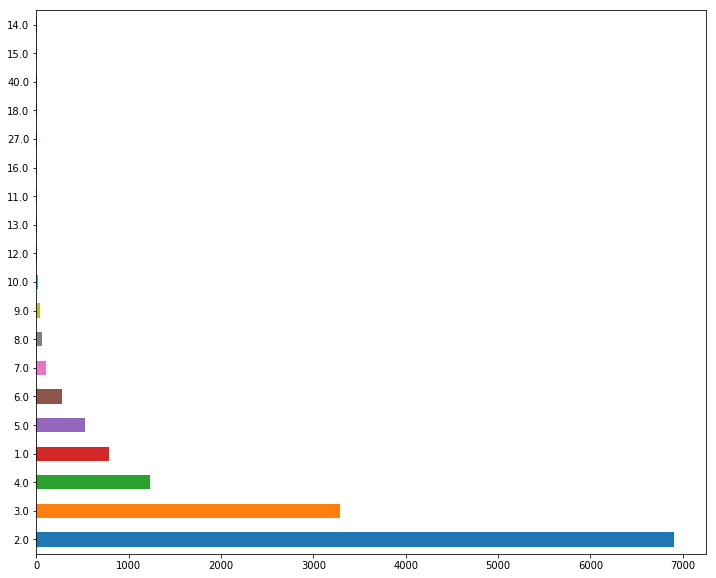

In [17]:
real_estate["bath"].value_counts().plot('barh',figsize=(12,10))


In [18]:
real_estate["bath"].fillna(2,inplace=True)

In [19]:
real_estate.isnull().sum()

area_type          0
availability       0
location           1
society         5502
total_sqft         0
bath               0
balcony          609
price              0
SIZE               0
dtype: int64

In [20]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13319 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13320 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
SIZE            13320 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 936.6+ KB


# cleaning in "balcony" column....

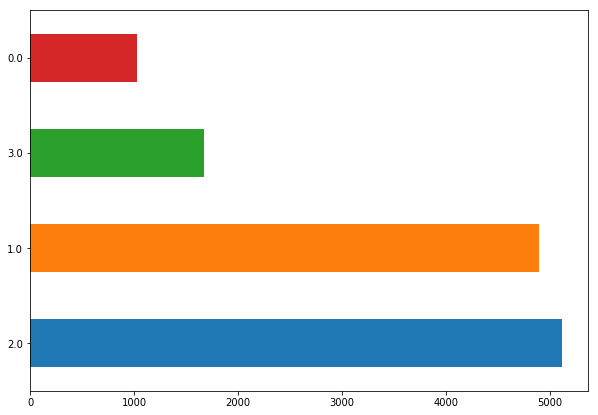

In [21]:
real_estate["balcony"].value_counts().plot('barh',figsize=(10,7))

In [22]:
real_estate["balcony"].fillna(1,inplace=True)

In [23]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13319 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13320 non-null float64
balcony         13320 non-null float64
price           13320 non-null float64
SIZE            13320 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 936.6+ KB


In [24]:
real_estate.isnull().sum()

area_type          0
availability       0
location           1
society         5502
total_sqft         0
bath               0
balcony            0
price              0
SIZE               0
dtype: int64

# handling "total sqft"

In [25]:
hyp=real_estate.loc[real_estate['total_sqft'].str.contains('[-]'),:].copy()
mn=hyp['total_sqft'].str.split(" - ",expand=True).astype(float)
mn['mean']=(mn[0]+mn[1])/2

real_estate.loc[real_estate['total_sqft'].str.contains('-'),'total_sqft']=mn['mean']

#real_estate.loc[real_estate['SIZE']=='0',:]

#real_estate['total_sqft']=real_estate['total_sqft'].astype(str)

In [26]:
real_estate['total_sqft']=real_estate['total_sqft'].astype(str)

#Converting the Sq. Meter values to Sq. Feet
convert=pd.DataFrame()
convert['meter_string']=real_estate.loc[real_estate['total_sqft'].str.contains('Sq. Meter'),'total_sqft'].copy()
convert['meter_float']=convert['meter_string'].str.replace('Sq. Meter','').astype(float)
convert['meter2_feet']=(convert['meter_float']*10.7639).round(3)

real_estate.loc[real_estate['total_sqft'].str.contains('Meter'),'total_sqft']=convert['meter2_feet']

real_estate['total_sqft']=real_estate['total_sqft'].astype(str)

#--Converting the Sq. Yards values to Sq. Feet
convert2=pd.DataFrame()
convert2['yard_string']=real_estate.loc[real_estate['total_sqft'].str.contains('Yard'),'total_sqft'].copy()
convert2['yard_float']=convert2['yard_string'].str.replace('Sq. Yards','').astype(float)
convert2['yard2_feet']=(convert2['yard_float']*9).round(3)
#house['total_sqft']=house['total_sqft'].astype(str)
convert2['yard2_feet']=convert2['yard_float'].astype(str)
real_estate.loc[real_estate['total_sqft'].str.contains('Yard'),'total_sqft']=convert2['yard2_feet']

#--Converting the Sq. Perch values to Sq. Feet
convert3=pd.DataFrame()
convert3['perch_string']=real_estate.loc[real_estate['total_sqft'].str.contains('Perch'),'total_sqft'].copy()
convert3['perch_float']=convert3['perch_string'].str.replace('Perch','').astype(float)
convert3['perch2_feet']=(convert3['perch_float']*272.25).round(3)
convert3['perch2_feet']=convert3['perch2_feet'].astype(str)
real_estate.loc[real_estate['total_sqft'].str.contains('Perch'),'total_sqft']=convert3['perch2_feet']

#--Converting the Acres values to Sq. Feet
convert4=pd.DataFrame()
convert4['Acre_string']=real_estate.loc[real_estate['total_sqft'].str.contains('Acre'),'total_sqft'].copy()
convert4['Acre_float']=convert4['Acre_string'].str.replace('Acres','').astype(float)
convert4['Acre_feet']=(convert4['Acre_float']*43560).round(3)
convert4['Acre_feet']=convert4['Acre_feet'].astype(str)
real_estate.loc[real_estate['total_sqft'].str.contains('Acres'),'total_sqft']=convert4['Acre_feet']

#--Converting the Guntha values to Sq. Feet
convert5=pd.DataFrame()
convert5['guntha_string']=real_estate.loc[real_estate['total_sqft'].str.contains('Guntha'),'total_sqft'].copy()
convert5['guntha_float']=convert5['guntha_string'].str.replace('Guntha','').astype(float)
convert5['guntha_feet']=(convert5['guntha_float']*1088.98).round(3)
convert5['guntha_feet']=convert5['guntha_feet'].astype(str)
real_estate.loc[real_estate['total_sqft'].str.contains('Guntha'),'total_sqft']=convert5['guntha_feet']

#--Converting the Cent values to Sq. Feet
convert6=pd.DataFrame()
convert6['cent_string']=real_estate.loc[real_estate['total_sqft'].str.contains('Cent'),'total_sqft'].copy()
convert6['cent_float']=convert6['cent_string'].str.replace('Cents','').astype(float)
convert6['cent_feet']=(convert6['cent_float']*435.6).round(3)
convert6['cent_feet']=convert6['cent_feet'].astype(str)
real_estate.loc[real_estate['total_sqft'].str.contains('Cents'),'total_sqft']=convert6['cent_feet']

#--Converting the groud values to Sq. Feet
convert7=pd.DataFrame()
convert7['Grounds_string']=real_estate.loc[real_estate['total_sqft'].str.contains('Grounds'),'total_sqft'].copy()
convert7['Grounds_float']=convert7['Grounds_string'].str.replace('Grounds','').astype(float)
convert7['Grounds_feet']=(convert7['Grounds_float']*2400).round(3)
convert7['Grounds_feet']=convert7['Grounds_feet'].astype(str)
real_estate.loc[real_estate['total_sqft'].str.contains('Grounds'),'total_sqft']=convert7['Grounds_feet']

real_estate['total_sqft'].astype(float)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
5        1170.0
6        2732.0
7        3300.0
8        1310.0
9        1020.0
10       1800.0
11       2785.0
12       1000.0
13       1100.0
14       2250.0
15       1175.0
16       1180.0
17       1540.0
18       2770.0
19       1100.0
20        600.0
21       1755.0
22       2800.0
23       1767.0
24        510.0
25       1250.0
26        660.0
27       1610.0
28       1151.0
29       1025.0
          ...  
13290    4050.0
13291     812.0
13292    1440.0
13293    2425.0
13294    2200.0
13295    1810.0
13296    1200.0
13297    1060.0
13298    1015.0
13299    2856.0
13300    1500.0
13301    1454.0
13302    1075.0
13303     774.0
13304    1187.0
13305     500.0
13306    1200.0
13307    1805.0
13308    1527.0
13309    1675.0
13310    1050.0
13311    1500.0
13312    1262.0
13313    1345.0
13314    1715.0
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length

# cleaning in "Availability" column....

In [27]:
real_estate['availability'].unique() #checking unique values

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

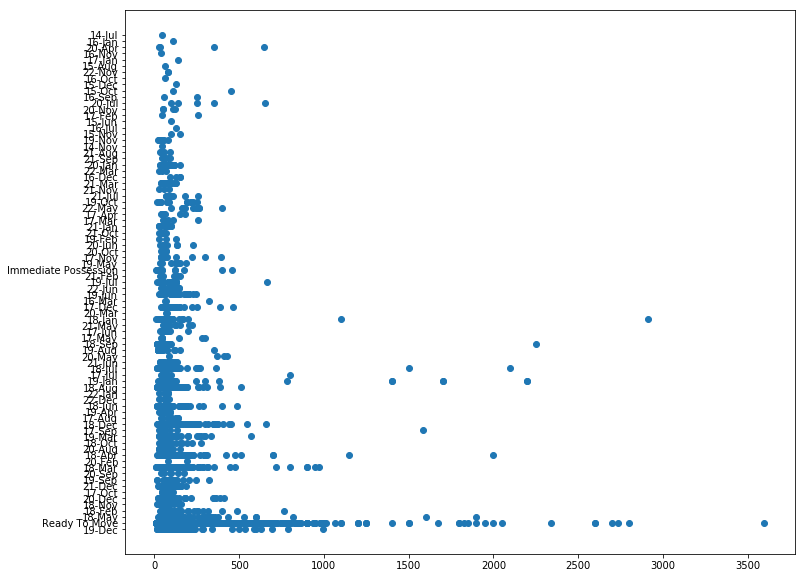

In [28]:
plt.figure(figsize=(12,10))
plt.scatter(real_estate['price'], real_estate['availability'])
plt.show()

In [29]:
#splittting availability column
type(real_estate['availability'])
real_estate['avail']=real_estate['availability'].str.split('-').str[1]

In [30]:
real_estate.isnull().sum()

area_type           0
availability        0
location            1
society          5502
total_sqft          0
bath                0
balcony             0
price               0
SIZE                0
avail           10597
dtype: int64

In [31]:
#replacing na of avail column to ready to move
real_estate['avail'].fillna('Ready to Move',inplace = True)

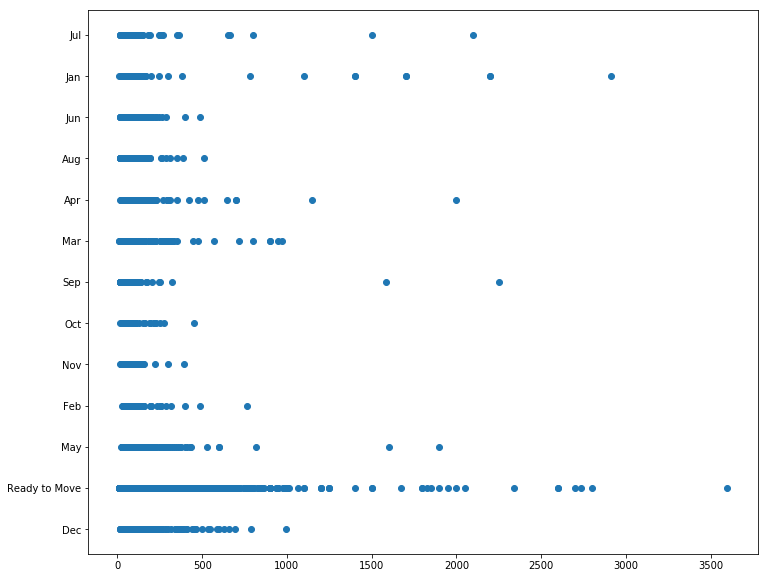

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(real_estate['price'], real_estate['avail'])
plt.show()

In [33]:
real_estate['avail'].value_counts()

Ready to Move    10597
Dec                728
May                338
Apr                298
Aug                249
Mar                246
Jul                206
Jun                200
Jan                126
Oct                 91
Sep                 87
Nov                 79
Feb                 75
Name: avail, dtype: int64

In [34]:
import numpy as np
#converting it to number
real_estate['avail'] = np.where(real_estate['avail']=='Ready to Move', 1, 0)

In [35]:
real_estate.head(10)

,area_type,availability,location,society,total_sqft,bath,balcony,price,SIZE,avail
0,4,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2,0
1,3,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4,1
2,2,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3,1
3,4,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3,1
4,4,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2,1
5,4,Ready To Move,Whitefield,DuenaTa,1170,2.0,1.0,38.00,2,1
6,4,18-May,Old Airport Road,Jaades,2732,4.0,1.0,204.00,4,0
7,4,Ready To Move,Rajaji Nagar,Brway G,3300,4.0,1.0,600.00,4,1
8,4,Ready To Move,Marathahalli,NaN,1310,3.0,1.0,63.25,3,1
9,3,Ready To Move,Gandhi Bazar,NaN,1020,6.0,1.0,370.00,6,1


In [36]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13319 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13320 non-null float64
balcony         13320 non-null float64
price           13320 non-null float64
SIZE            13320 non-null int64
avail           13320 non-null int32
dtypes: float64(3), int32(1), int64(2), object(4)
memory usage: 988.7+ KB


In [37]:
real_estate['total_sqft']=real_estate['total_sqft'].astype(float)

# handling "society" column

In [38]:
real_estate.isnull().sum()

area_type          0
availability       0
location           1
society         5502
total_sqft         0
bath               0
balcony            0
price              0
SIZE               0
avail              0
dtype: int64

In [39]:
real_estate.shape

(13320, 10)

In [40]:
5499/13320

0.41283783783783784

missing value of society is 41%...which is near about 50%....so we dropped the "society" column

In [41]:
#dropping na values
real_estate.drop(['society'],inplace=True,axis=1)

In [42]:
real_estate

,area_type,availability,location,total_sqft,bath,balcony,price,SIZE,avail
0,4,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0
1,3,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,1
2,2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,1
3,4,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,1
4,4,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,1
5,4,Ready To Move,Whitefield,1170.0,2.0,1.0,38.00,2,1
6,4,18-May,Old Airport Road,2732.0,4.0,1.0,204.00,4,0
7,4,Ready To Move,Rajaji Nagar,3300.0,4.0,1.0,600.00,4,1
8,4,Ready To Move,Marathahalli,1310.0,3.0,1.0,63.25,3,1
9,3,Ready To Move,Gandhi Bazar,1020.0,6.0,1.0,370.00,6,1


In [43]:
real_estate.isnull().sum()

area_type       0
availability    0
location        1
total_sqft      0
bath            0
balcony         0
price           0
SIZE            0
avail           0
dtype: int64

In [44]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13319 non-null object
total_sqft      13320 non-null float64
bath            13320 non-null float64
balcony         13320 non-null float64
price           13320 non-null float64
SIZE            13320 non-null int64
avail           13320 non-null int32
dtypes: float64(4), int32(1), int64(2), object(2)
memory usage: 884.6+ KB


In [45]:
real_estate.drop(["availability"],inplace=True,axis=1)

In [46]:
real_estate

,area_type,location,total_sqft,bath,balcony,price,SIZE,avail
0,4,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0
1,3,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,1
2,2,Uttarahalli,1440.0,2.0,3.0,62.00,3,1
3,4,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,1
4,4,Kothanur,1200.0,2.0,1.0,51.00,2,1
5,4,Whitefield,1170.0,2.0,1.0,38.00,2,1
6,4,Old Airport Road,2732.0,4.0,1.0,204.00,4,0
7,4,Rajaji Nagar,3300.0,4.0,1.0,600.00,4,1
8,4,Marathahalli,1310.0,3.0,1.0,63.25,3,1
9,3,Gandhi Bazar,1020.0,6.0,1.0,370.00,6,1


In [47]:
real_estate['area_type'].astype(float)

0        4.0
1        3.0
2        2.0
3        4.0
4        4.0
5        4.0
6        4.0
7        4.0
8        4.0
9        3.0
10       4.0
11       3.0
12       4.0
13       2.0
14       3.0
15       4.0
16       4.0
17       4.0
18       4.0
19       4.0
20       2.0
21       4.0
22       3.0
23       4.0
24       4.0
25       4.0
26       4.0
27       2.0
28       4.0
29       4.0
        ... 
13290    4.0
13291    3.0
13292    4.0
13293    4.0
13294    4.0
13295    4.0
13296    4.0
13297    4.0
13298    4.0
13299    4.0
13300    3.0
13301    4.0
13302    4.0
13303    3.0
13304    4.0
13305    1.0
13306    3.0
13307    2.0
13308    2.0
13309    4.0
13310    4.0
13311    3.0
13312    4.0
13313    4.0
13314    4.0
13315    2.0
13316    4.0
13317    2.0
13318    4.0
13319    4.0
Name: area_type, Length: 13320, dtype: float64

In [48]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type     13320 non-null int64
location      13319 non-null object
total_sqft    13320 non-null float64
bath          13320 non-null float64
balcony       13320 non-null float64
price         13320 non-null float64
SIZE          13320 non-null int64
avail         13320 non-null int32
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 780.5+ KB


# Handling "Location" column...

In [49]:
real_estate.dropna(inplace=True)

real_estate.head()

,area_type,location,total_sqft,bath,balcony,price,SIZE,avail
0,4,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0
1,3,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,1
2,2,Uttarahalli,1440.0,2.0,3.0,62.00,3,1
3,4,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,1
4,4,Kothanur,1200.0,2.0,1.0,51.00,2,1


In [50]:
# using label encoder
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
real_estate["location"]=encode.fit_transform(real_estate["location"])

In [51]:
real_estate.head()

,area_type,location,total_sqft,bath,balcony,price,SIZE,avail
0,4,419,1056.0,2.0,1.0,39.07,2,0
1,3,317,2600.0,5.0,3.0,120.00,4,1
2,2,1179,1440.0,2.0,3.0,62.00,3,1
3,4,757,1521.0,3.0,1.0,95.00,3,1
4,4,716,1200.0,2.0,1.0,51.00,2,1


In [52]:
#real_estate.info()
#real_estate.to_csv("C:/Users/vish/Desktop/dataset.csv")

In [53]:

real_estate=real_estate.astype(float)

In [54]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
area_type     13319 non-null float64
location      13319 non-null float64
total_sqft    13319 non-null float64
bath          13319 non-null float64
balcony       13319 non-null float64
price         13319 non-null float64
SIZE          13319 non-null float64
avail         13319 non-null float64
dtypes: float64(8)
memory usage: 936.5 KB


In [134]:
from sklearn.random_projection import GaussianRandomProjection
tt=GaussianRandomProjection(real_estate)
print(tt.fit)

<bound method BaseRandomProjection.fit of GaussianRandomProjection(eps=0.1,
             n_components=       area_type  location  total_sqft  bath  balcony     price  SIZE  avail
0            4.0     419.0      1056.0   2.0      1.0  3.665355   2.0    0.0
1            3.0     317.0      2600.0   5.0      3.0  4.787492   4.0    1.0
2            2.0    1179.0      1440.0   2.0      3.0  4...319        4.0     396.0       550.0   1.0      1.0  2.833213   1.0    1.0

[13319 rows x 8 columns],
             random_state=None)>


In [55]:
# export for visualization
#real_estate.to_csv("C:/Users/vish/Desktop/viz.csv")

In [56]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

In [57]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(real_estate['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.7019304 ]
 [-0.69897681]
 [-0.6952177 ]
 [-0.68850501]
 [-0.68850501]
 [-0.68850501]
 [-0.68850501]
 [-0.68850501]
 [-0.68850501]
 [-0.68682684]]

outer range (high) of the distribution:
[[14.01229387]
 [14.34792855]
 [14.95207097]
 [16.69737129]
 [16.69737129]
 [17.36864065]
 [17.61029761]
 [18.03991   ]
 [18.79173168]
 [23.41006484]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


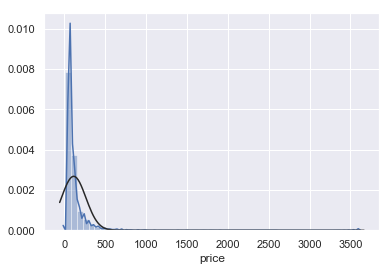

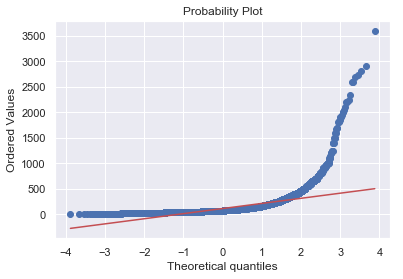

In [58]:
#histogram and normal probability plot
sns.distplot(real_estate['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(real_estate['price'], plot=plt)

In [59]:
#applying log transformation
real_estate['price'] = np.log(real_estate['price'])

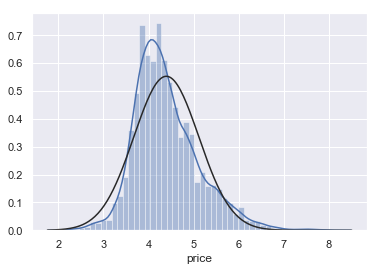

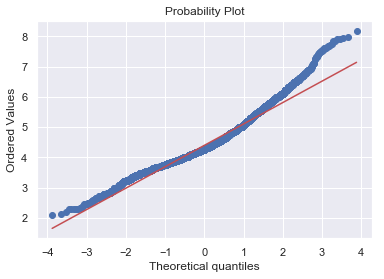

In [60]:
#transformed histogram and normal probability plot
sns.distplot(real_estate['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(real_estate['price'], plot=plt)

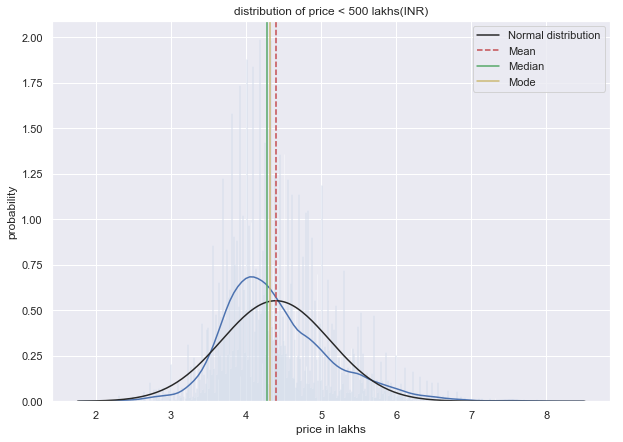

In [61]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(real_estate[real_estate['price'] < 500]['price'], kde=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price < 500 lakhs(INR)', xlabel='price in lakhs', ylabel='probability')
ax.axvline(real_estate['price'].mean(), color='r', linestyle='--')
ax.axvline(real_estate['price'].median(), color='g', linestyle='-')
ax.axvline(real_estate['price'].mode().get_values()[0], color='y', linestyle='-')
plt.legend({'Normal distribution': stats.norm, 'Mean':real_estate['price'].mean(),'Median':real_estate['price'].median(), 'Mode': real_estate['price'].mode().get_values()[0]})
plt.show()

# Using ml algorithm 

In [62]:
x=real_estate.price     # taking only labels
y=real_estate.drop(['price'],axis=1)  # taking only attributes

In [63]:
# spliting data into test and train sets
from sklearn.model_selection import train_test_split
train_labels,test_labels,train_data,test_data=train_test_split(x,y,test_size=.25,random_state=10)

In [64]:
test_data

,area_type,location,total_sqft,bath,balcony,SIZE,avail
6768,4.0,1039.0,1320.0,2.0,2.0,2.0,1.0
507,4.0,575.0,1000.0,2.0,1.0,2.0,1.0
9039,4.0,506.0,1194.0,2.0,2.0,2.0,1.0
11422,4.0,1148.0,1732.0,3.0,1.0,3.0,0.0
11547,2.0,230.0,2700.0,3.0,0.0,4.0,1.0
2393,4.0,1084.0,1100.0,2.0,1.0,2.0,1.0
11962,2.0,972.0,1021.0,3.0,2.0,3.0,1.0
6209,4.0,1025.0,1914.0,3.0,2.0,3.0,1.0
2119,4.0,72.0,1405.0,2.0,2.0,3.0,1.0
6046,4.0,509.0,1459.0,3.0,2.0,3.0,1.0


In [128]:
from sklearn.neural_network import  MLPRegressor

clf = MLPRegressor( solver='sgd',activation="logistic" ,learning_rate="adaptive",
          hidden_layer_sizes=(1000,250), random_state=1)

temp= clf.fit(train_data,train_labels) 
                   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [126]:
dl_predection=temp.predict(test_data)

In [127]:
import numpy as np
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(test_labels,dl_predection)))
print(np.sqrt(metrics.r2_score(test_labels,dl_predection)))
print(np.sqrt(metrics.mean_absolute_error(test_labels,dl_predection)))


0.6514327054125831
0.3833109897365362
0.7107758814132158


In [69]:
#using linear model
import sklearn as model
from sklearn import linear_model

In [70]:
lm=linear_model.LinearRegression()
model_linear=lm.fit(train_data,train_labels)


In [71]:
P1=model_linear.predict(test_data)

In [72]:
# checking for error and accuracy of the model
import numpy as np
from sklearn import metrics


In [73]:
# using random forest algo
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(n_estimators = 500, random_state = 7)
model_rand=rf.fit(train_data,train_labels)

In [74]:
P2=model_rand.predict(test_data)

In [93]:
print(np.sqrt(metrics.mean_squared_error(test_labels,P2)))
print(np.sqrt(metrics.r2_score(test_labels,P2)))
print(np.sqrt(metrics.mean_absolute_error(test_labels,P2)))


0.3438619491478379
0.8731023274589285
0.4817105158184889


In [84]:
#using gradent boost
from sklearn.ensemble import gradient_boosting
gb=gradient_boosting.GradientBoostingRegressor(n_estimators=49,random_state = 7)
model_gradent=gb.fit(train_data,train_labels)

In [85]:
P3=model_gradent.predict(test_data)

In [86]:
print(np.sqrt(metrics.mean_squared_error(test_labels,P3)))
print(np.sqrt(metrics.r2_score(test_labels,P3)))
print(np.sqrt(metrics.mean_absolute_error(test_labels,P3)))


0.3697655728081685
0.8515558640527275
0.5208904094922056


In [ ]:
tempdata=pd.Series(P3)

tempdata2=pd.DataFrame(tempdata,test_labels)
#tempdata.to_csv("predection.csv")
#test_labels.to_csv("lablels.csv")
tempdata2.to_csv("viz.csv")


In [ ]:
#using svm algo
from sklearn import svm
svm=svm.SVR(gamma='auto')
model_svm=svm.fit(train_data,train_labels)

In [ ]:
P4=model_svm.predict(test_data)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(test_labels,P4)))

print(np.sqrt(metrics.mean_absolute_error(test_labels,P4)))

#  creating and testing the pickle file

In [ ]:
# using gradent boost since it has least R2
import pickle
pickle.dump(model_gradent, open("C:/Users/akash/Desktop/gb.pkl", 'wb'))
pickle.dump(model_rand, open("C:/Users/akash/Desktop/rf.pkl", 'wb'))

In [ ]:

loaded_model = pickle.load(open("C:/Users/akash/Desktop/gb.pkl", 'rb'))

In [ ]:
mm=loaded_model.predict(test_data)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(test_labels,mm)))

In [ ]:
test_data.info()